# Analysis: Base 

Goal: Base analysis file for further EDA before running regression.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

#import helper 

## Import data

In [4]:
FINAL_FILE = 'data/brickset_final.csv'

In [5]:
set_df = pd.read_csv(FINAL_FILE)
set_df.head()
set_df.info()

,set_no,name,url,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,...,rating_value,rating_votes,tags,set_type,packaging,inventory_id,number_parts,total_parts,1st_color,2nd_color
0,858-1,Auto Engines,/sets/858-1/Auto-Engines,Technical,Technic,NaN,1980.0,242.0,0.0,NaN,...,4.5,2.0,NaN,Normal,Box,4886,46,242,Blue,Light Gray
1,1591-1,Danone Delivery Truck,/sets/1591-1/Danone-Delivery-Truck,Modern day,Town,Special,1980.0,40.0,0.0,NaN,...,NaN,NaN,"Delivery Truck, Truck",Normal,Box,11940,19,40,White,Blue
2,1592-1,Town Square - Castle Scene,/sets/1592-1/Town-Square-Castle-Scene,Modern day,Town,Classic,1980.0,471.0,11.0,NaN,...,4.8,4.0,"Brick Built Animals, Car, Carriage, Castle, Co...",Normal,Box,14106,133,495,Black,Yellow
3,1651-2,Maersk Line Container Lorry,/sets/1651-2/Maersk-Line-Container-Lorry,Modern day,Town,Special,1980.0,305.0,1.0,NaN,...,5.0,1.0,"Articulated Lorry, Maersk, Trailer, Truck",Normal,Box,14402,66,305,Maersk Blue,Light Gray
4,3634-1,Charlie Crow's Carry-All,/sets/3634-1/Charlie-Crow-s-Carry-All,Junior,Fabuland,NaN,1980.0,17.0,1.0,NaN,...,3.0,1.0,"Car, Pickup Truck",Normal,NaN,10916,15,18,Yellow,Green


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056 entries, 0 to 5055
Data columns (total 24 columns):
set_no           5056 non-null object
name             5056 non-null object
url              5056 non-null object
theme_group      5056 non-null object
theme            5056 non-null object
subtheme         3757 non-null object
year             5056 non-null float64
piece_cnt        5013 non-null float64
minifig_cnt      5056 non-null float64
inventory_url    3991 non-null object
minifig_url      3549 non-null object
price_store      3858 non-null float64
price_new        4722 non-null float64
price_used       4639 non-null float64
rating_value     4237 non-null float64
rating_votes     4237 non-null float64
tags             4867 non-null object
set_type         5056 non-null object
packaging        4672 non-null object
inventory_id     5056 non-null int64
number_parts     5056 non-null int64
total_parts      5056 non-null int64
1st_color        5056 non-null object
2nd_color     

## Investigate the surviving sets

In [6]:
set_df['theme_group'].value_counts()

Modern day          1223
Licensed            1051
Action/Adventure     837
Model making         442
Historical           424
Technical            380
Girls                319
Racing               232
Junior               148
Name: theme_group, dtype: int64

In [7]:
InteractiveShell.ast_node_interactivity = 'last'

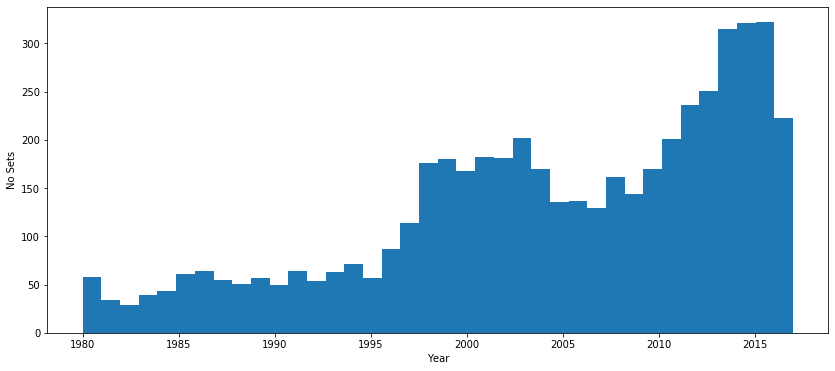

In [8]:
# sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
plt.show()

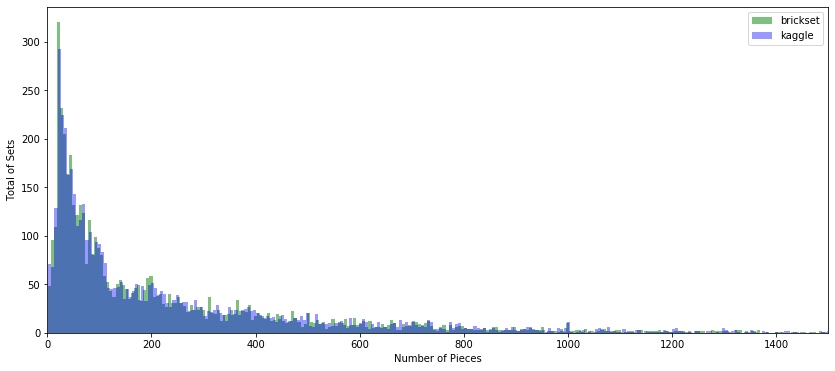

In [9]:
# piece count distribution brickset vs kaggle

piece_df = set_df.loc[(set_df['piece_cnt']>=1) & (set_df['total_parts']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.set(xlabel='Number of Pieces', ylabel='Total of Sets', xlim=(0, 1500))

axs.hist(piece_df['piece_cnt'].values, bins=1000, color='green', label='brickset', alpha=.5)
axs.hist(piece_df['total_parts'].values, bins=1000, color='blue', label='kaggle', alpha=.4)

plt.legend()
plt.show()

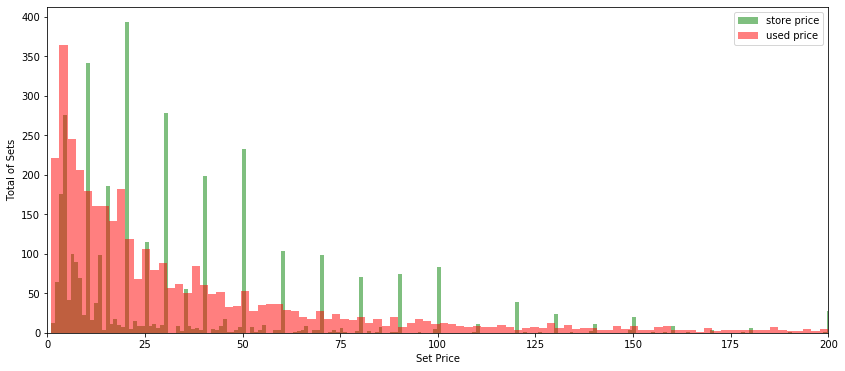

In [10]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

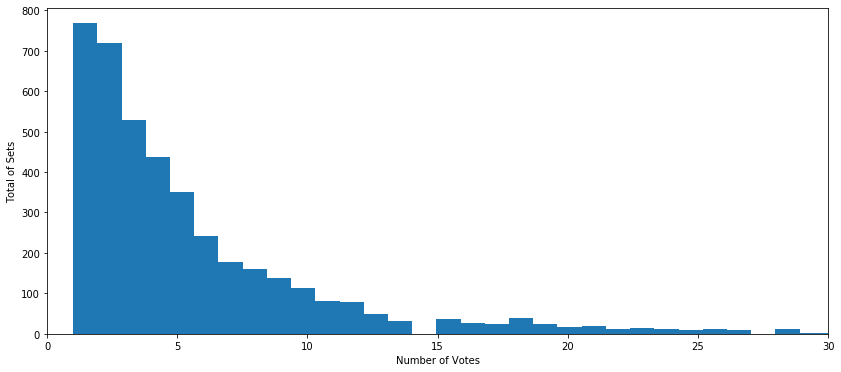

In [11]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

votes_df = set_df.loc[set_df['rating_votes'].isna()==False]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(votes_df['rating_votes'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

In [12]:
# create a popularity column, feature-engineering for ratings

set_df['popularity'] = set_df['rating_value'] * set_df['rating_votes']
set_df['popularity'].head()

0     9.0
1     NaN
2    19.2
3     5.0
4     3.0
Name: popularity, dtype: float64

In [13]:
# visualize the popularity

popularity_df = set_df.loc[set_df['popularity'].isna()==False]
popularity_df.shape

(4237, 25)

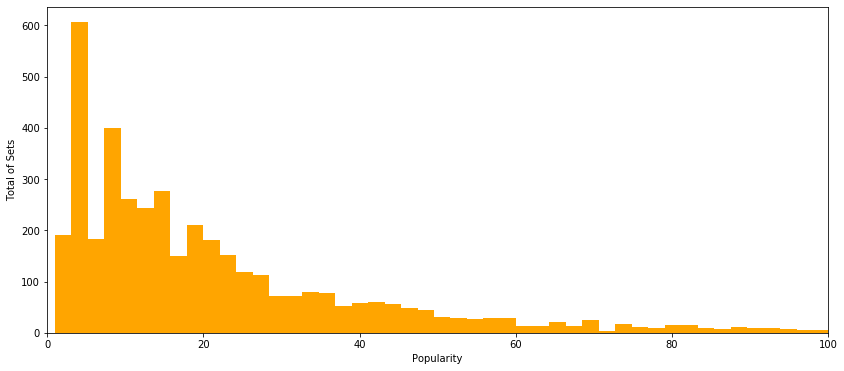

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))

axs.hist(popularity_df['popularity'].values, bins=200, color='orange')
axs.set(xlabel='Popularity', ylabel='Total of Sets', xlim=(0, 100))  

plt.show()